In [8]:
import pandas as pd
import matplotlib.pyplot as plt

SyntaxError: invalid syntax (314524242.py, line 3)

In [5]:
df = pd.read_csv('../data/raw/SemgHandGenderCh2.csv')

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
0,1,4.727125,2.797737,3.636139,2.746511,0.971014,2.210892,3.344643,0.584697,2.450385,...,9.894692,10.832140,2.546618,14.407009,10.137272,7.191183,3.140133,10.960079,10.386093,19.743019
1,1,1.894545,3.571849,0.543422,1.123648,2.192368,1.681804,2.687658,3.015263,3.603032,...,21.014158,9.182535,14.132000,13.131475,5.276342,21.889366,1.085331,10.976741,13.246109,10.024546
2,1,3.710899,2.427400,1.624620,0.835390,1.268488,1.498597,0.799706,1.259650,0.412866,...,2.201053,2.613174,2.545647,2.449019,0.674977,2.705351,1.734972,3.257594,4.000138,4.744451
3,1,3.735356,1.711950,1.650200,2.756996,0.357680,2.109572,3.014635,0.788100,0.830203,...,1.926054,3.989822,1.042844,1.664558,0.903007,2.833268,3.667484,6.088835,5.672129,10.409036
4,1,2.184481,4.492565,2.798087,1.239415,2.665162,4.591200,1.697186,3.530575,2.928534,...,20.042595,13.009804,11.960200,4.626605,4.865955,17.490022,5.492821,9.606237,11.622674,5.458660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2,37.432872,2.642471,4.051526,2.386753,0.585707,1.432737,2.641559,1.904684,1.723651,...,10.688586,4.485726,4.946094,8.499407,8.232456,4.466518,2.120723,11.503392,22.050844,5.509672
596,2,2.605382,3.792778,4.999314,3.869037,1.927833,0.213747,5.387151,2.598703,4.571977,...,10.151289,16.546333,12.487424,20.616876,5.935576,3.748928,35.041523,34.696292,57.640567,84.634701
597,2,2.926710,5.070200,1.313878,2.584313,1.529417,1.300754,2.271922,1.315232,1.045668,...,2.823532,8.482230,11.138191,5.947360,7.065608,11.031049,5.500559,5.859645,9.174426,3.392530
598,2,2.186149,5.444141,1.366482,2.961013,0.857871,2.094524,1.402022,1.407400,1.460594,...,17.152255,6.522013,11.050994,7.982046,3.248997,5.694647,2.184976,5.629921,6.124313,33.899782


In [17]:
# import numpy as np
# x = df[df.columns[1:]].corr().abs()
# # select upper traingle of correlation matrix
# upper = x.where(np.triu(np.ones(x.shape), k=1).astype(np.bool))
# to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]


/var/folders/n1/jh932ln16_n9fr4df9q0vqdc0000gn/T/ipykernel_66976/1750120075.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = x.where(np.triu(np.ones(x.shape), k=1).astype(np.bool))


In [18]:
# to_drop

[]

In [26]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(0.9)
x1 = vt.fit_transform(df[df.columns[1:]])
print(x1.shape)

(600, 1500)


In [4]:
df.groupby(df.columns[0]).count()

,1,2,3,4,5,6,7,8,9,10,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500
0,,,,,,,,,,,,,,,,,,,,,
1,390,390,390,390,390,390,390,390,390,390,...,390,390,390,390,390,390,390,390,390,390
2,210,210,210,210,210,210,210,210,210,210,...,210,210,210,210,210,210,210,210,210,210


In [5]:
X = df[df.columns[1:]]
y = df[df.columns[0]]

In [19]:
from sklearn.decomposition import PCA

pca = PCA()
X_embedded = pca.fit_transform(X)

In [23]:
pca.explained_variance_ratio_

array([5.29176197e-01, 4.91043950e-02, 2.77287940e-02, 1.87766499e-02,
       9.77481324e-03, 7.99822144e-03, 7.34502907e-03, 6.59728303e-03,
       6.50459104e-03, 6.40221822e-03, 5.63366629e-03, 5.47642086e-03,
       5.31925118e-03, 5.03070413e-03, 4.76979855e-03, 4.72705462e-03,
       4.57765722e-03, 4.44503104e-03, 4.36676928e-03, 4.18561531e-03,
       4.13431871e-03, 3.96021355e-03, 3.90614901e-03, 3.87349212e-03,
       3.76034219e-03, 3.72729158e-03, 3.62253509e-03, 3.53908882e-03,
       3.51160172e-03, 3.47621186e-03, 3.43365317e-03, 3.33320557e-03,
       3.30685613e-03, 3.26538514e-03, 3.13558814e-03, 3.09388411e-03,
       3.03716709e-03, 2.97189994e-03, 2.95135556e-03, 2.92225391e-03,
       2.89337678e-03, 2.81835465e-03, 2.77772396e-03, 2.75653387e-03,
       2.70198777e-03, 2.67308726e-03, 2.64040140e-03, 2.59414941e-03,
       2.55859365e-03, 2.54388658e-03, 2.53009314e-03, 2.47629279e-03,
       2.43564576e-03, 2.37268837e-03, 2.36220601e-03, 2.31880282e-03,
      

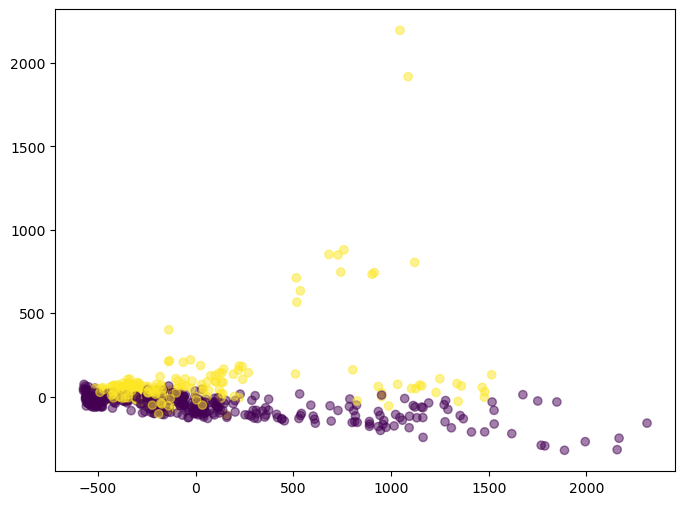

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, alpha=0.5)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

# ss_test = StandardScaler()
X_test = ss_train.transform(X_test)

In [18]:
models = {}

# Logistic Regression
# from sklearn.linear_model import LogisticRegression
# models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
# from sklearn.neighbors import KNeighborsClassifier
# models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [23]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model


,Accuracy,Precision,Recall
Support Vector Machines,0.820000,0.824742,0.888889
Decision Trees,0.853333,0.876289,0.894737
Random Forest,0.866667,0.989691,0.834783
Naive Bayes,0.446667,0.268041,0.684211


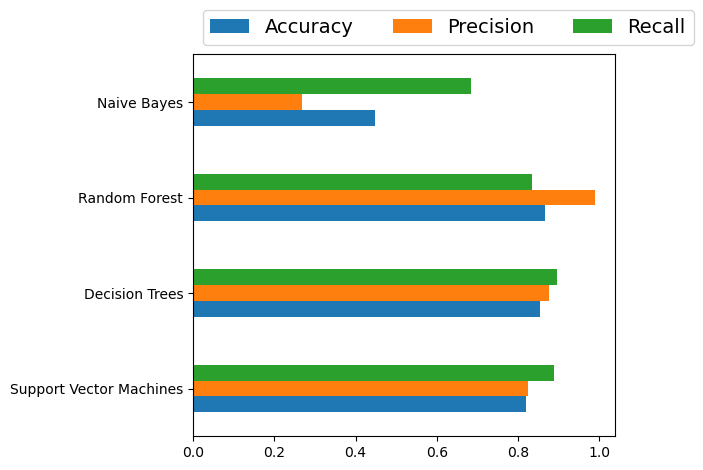

In [26]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()